 Load & Inspect the Data

In [2]:
import pandas as pd



In [3]:
df = pd.read_csv("german_credit_data.csv")

# Inspect the first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

Missing Values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose  

Checking for the NULL values

In [4]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


Handle Missing Values

In [5]:
# Handle missing values
df['Saving accounts'].fillna("no_info", inplace=True)
df['Checking account'].fillna("no_info", inplace=True)


C:\Users\dyk69\AppData\Local\Temp\ipykernel_9832\4183560138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna("no_info", inplace=True)
C:\Users\dyk69\AppData\Local\Temp\ipykernel_9832\4183560138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Preprocessing - Encoding Categorical Variables and Scaling Numerical Features

In [24]:
from sklearn.preprocessing import MinMaxScaler

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Normalize numeric features with MinMaxScaler
numerical_cols = ['Age', 'Credit amount', 'Duration']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [15]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric features
numerical_cols = ['Age', 'Credit amount', 'Duration']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


KMeans Clustering for Risk Groups

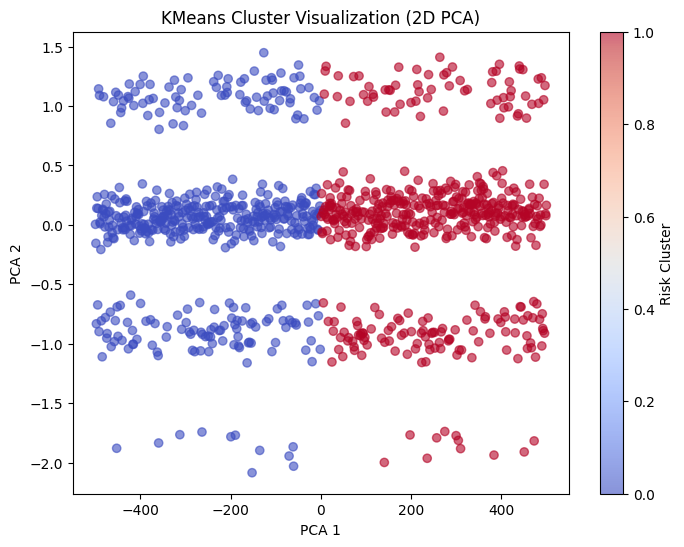

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# KMeans Clustering for Risk Groups
kmeans = KMeans(n_clusters=2, random_state=42)
df_encoded['Risk_Cluster'] = kmeans.fit_predict(df_encoded)

# Visualize Clusters with PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded.drop('Risk_Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_encoded['Risk_Cluster'], cmap='coolwarm', alpha=0.6)
plt.title('KMeans Cluster Visualization (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Risk Cluster')
plt.show()



Visualize Clusters with PCA

In [8]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric features
numerical_cols = ['Age', 'Credit amount', 'Duration']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

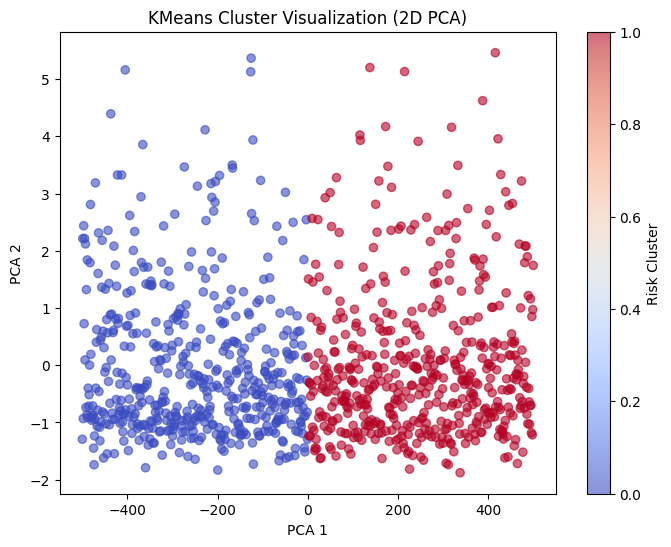

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded.drop('Risk_Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_encoded['Risk_Cluster'], cmap='coolwarm', alpha=0.6)
plt.title('KMeans Cluster Visualization (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Risk Cluster')
plt.show()


Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Train/Test Split
X = df_encoded.drop('Risk_Cluster', axis=1)
y = df_encoded['Risk_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the list of columns after encoding and scaling
import joblib
joblib.dump(list(X.columns), 'models/expected_columns.pkl')



['models/expected_columns.pkl']

Model Selection and Hyperparameter Tuning

In [14]:
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2']  # Updated to only use 'l2' penalty
    },
    'SVM': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}


Train and Compare Multiple Classifiers

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),  # Removed use_label_encoder
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}


# Evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-score': f1_score(y_test, preds)
    })

results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-score
4    Gradient Boosting     1.000   1.000000     1.0  1.000000
2                  SVM     1.000   1.000000     1.0  1.000000
5             AdaBoost     1.000   1.000000     1.0  1.000000
0        Random Forest     0.995   0.990476     1.0  0.995215
1  Logistic Regression     0.995   0.990476     1.0  0.995215
3              XGBoost     0.995   0.990476     1.0  0.995215


Training Models with GridSearchCV

In [16]:
# Hyperparameter tuning with GridSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")


Training Random Forest with GridSearchCV...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Logistic Regression with GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Training SVM with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training XGBoost with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Training Gradient Boosting with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Training AdaBoost with Gr

Evaluate Models and Save Results

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate each model and store results
results = []
for name, model in best_models.items():
    preds = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-score': f1_score(y_test, preds)
    })

results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-score
4    Gradient Boosting     1.000   1.000000     1.0  1.000000
5             AdaBoost     1.000   1.000000     1.0  1.000000
1  Logistic Regression     0.995   0.990476     1.0  0.995215
0        Random Forest     0.995   0.990476     1.0  0.995215
3              XGBoost     0.995   0.990476     1.0  0.995215
2                  SVM     0.995   0.990476     1.0  0.995215


Confusion Matrix for Best Model

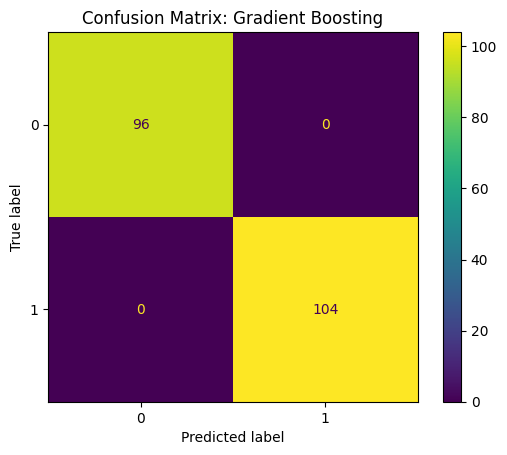

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Best Model
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix: {best_model_name}')
plt.show()


DBSCAN Clustering for Unsupervised Evaluation

In [19]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering for Unsupervised Evaluation
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_encoded['DBSCAN_Cluster'] = dbscan.fit_predict(df_encoded.drop(['Risk_Cluster', 'DBSCAN_Cluster'], axis=1, errors='ignore'))

# View DBSCAN cluster counts
print("\nDBSCAN Cluster Counts:\n", df_encoded['DBSCAN_Cluster'].value_counts())



DBSCAN Cluster Counts:
 DBSCAN_Cluster
-1    1000
Name: count, dtype: int64


Save Best Performing Model

In [20]:
import joblib

# Save the best performing model, scaler, and expected columns
joblib.dump(best_model, f'models/{best_model_name.lower().replace(" ", "_")}_model.pkl')
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(X_train.columns.tolist(), "models/expected_columns.pkl")


['models/expected_columns.pkl']

In [23]:
import joblib
import pandas as pd
import numpy as np

# Load the trained model, scaler, and expected columns
best_model = joblib.load('models/best_model.pkl')  # Load the best model
scaler = joblib.load('models/scaler.pkl')  # Load the scaler
expected_columns = joblib.load('models/expected_columns.pkl')  # Load the expected columns

# Sample input (this is just an example, make sure to replace it with real values)
sample_data = {
    'Age': [25],
    'Credit amount': [1000],
    'Duration': [12],
    'Saving accounts_critical': [0],  # Example of encoded feature
    'Saving accounts_no_info': [1],
    'Checking account_critical': [0],
    'Checking account_no_info': [1],
    'Purpose_education': [1],  # Example of encoded feature
    'Purpose_new_car': [0],
    'Purpose_used_car': [0],
    'Purpose_furniture_appliances': [0],
    'Purpose_radio_tv': [0],
    'Purpose_domestic_appliance': [0],
    # Add other columns in similar fashion...
    
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Ensure the sample input has the same columns as expected by the model
sample_df = sample_df.reindex(columns=expected_columns, fill_value=0)

# Apply scaling to the numerical features
numerical_cols = ['Age', 'Credit amount', 'Duration']
sample_df[numerical_cols] = scaler.transform(sample_df[numerical_cols])

# Predict using the best model
prediction = best_model.predict(sample_df)

# Output the prediction
print(f"Predicted Risk Cluster: {prediction[0]}")


Predicted Risk Cluster: 0


Save your StandardScaler